In [119]:
import pandas as pd
import numpy as np
import matplotlib as plt
from matplotlib import pyplot
import seaborn as sns

In [120]:
df = pd.read_csv('Downloads/diabetes.csv', sep='\t')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [121]:
# perfect data set, wow...
null_data = df.isnull()
null_data.value_counts()

AGE    SEX    BMI    BP     S1     S2     S3     S4     S5     S6     Y    
False  False  False  False  False  False  False  False  False  False  False    442
dtype: int64

In [122]:
df.dtypes

AGE      int64
SEX      int64
BMI    float64
BP     float64
S1       int64
S2     float64
S3     float64
S4     float64
S5     float64
S6       int64
Y        int64
dtype: object

In [123]:
for col in df.columns:
    print(null_data[col].value_counts())

False    442
Name: AGE, dtype: int64
False    442
Name: SEX, dtype: int64
False    442
Name: BMI, dtype: int64
False    442
Name: BP, dtype: int64
False    442
Name: S1, dtype: int64
False    442
Name: S2, dtype: int64
False    442
Name: S3, dtype: int64
False    442
Name: S4, dtype: int64
False    442
Name: S5, dtype: int64
False    442
Name: S6, dtype: int64
False    442
Name: Y, dtype: int64


In [124]:
df.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


          S3        S4
S3  1.000000 -0.738493
S4 -0.738493  1.000000


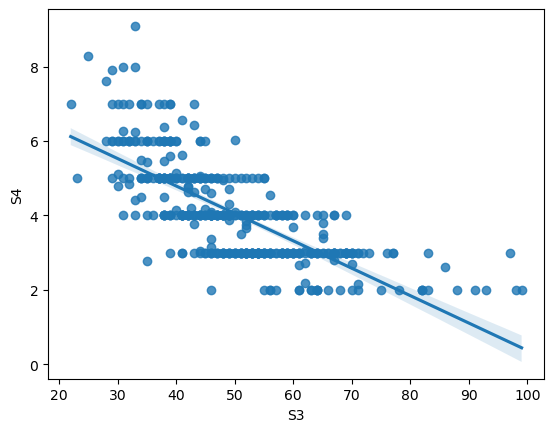

In [125]:
sns.regplot(x="S3",y="S4", data=df)
print(df[['S3','S4']].corr())

In [126]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

In [127]:
df[['AGE', 'BP', 'BMI', 'S6']].corr()

,AGE,BP,BMI,S6
AGE,1.000000,0.335428,0.185085,0.301731
BP,0.335428,1.000000,0.395411,0.390430
BMI,0.185085,0.395411,1.000000,0.388680
S6,0.301731,0.390430,0.388680,1.000000


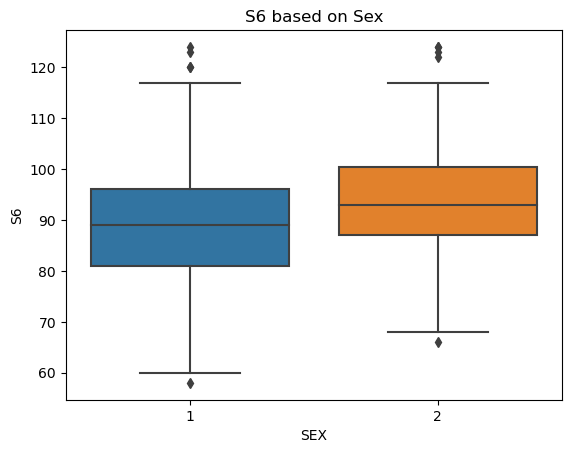

In [128]:
sns.boxplot(x='SEX', y='S6', data=df)
plt.pyplot.title('S6 based on Sex')
plt.pyplot.show()

In [129]:
from sklearn.linear_model import LinearRegression

In [130]:
lm = LinearRegression()

In [131]:
X = df[['BMI']]
Y = df[['BP']]
lm.fit(X,Y)

LinearRegression()

In [132]:
print('Y = {}x + {},\nwhere Y=BP and X=DMI'.format(lm.coef_, lm.intercept_))

Y = [[1.23786549]]x + [61.99733108],
where Y=BP and X=DMI


In [133]:
X = df[['BMI','BP', 'S1', 'S6']]
lm.fit(X,Y)

LinearRegression()

In [134]:
s= ''
for i in range(len(lm.coef_[0])):
    s+= '{}x{} + '.format(lm.coef_[0][i],i+1)
s+= str(lm.intercept_[0])
s = 'BP = {}'.format(s) 
print(s)

BP = 2.3496573428837012e-15x1 + 0.9999999999999987x2 + -2.414322382819951e-16x3 + -7.900104585528176e-17x4 + 1.2789769243681803e-13


In [135]:
def plot_poly(model, ind_var, dep_var, x_name,y_name):
    x_new = np.linspace(15,300,100)
    y_new = model(x_new)
    plt.pyplot.plot(ind_var,dep_var,'.',x_new,y_new,'-')
    plt.pyplot.title('Polynomial Fit with Matplotlib')
    ax = plt.pyplot.gca()
    ax.set_facecolor((0.898,0.898,0.898))
    fig = plt.pyplot.gcf()
    plt.pyplot.xlabel(x_name)
    plt.pyplot.ylabel(y_name)
    plt.pyplot.show()
    plt.pyplot.close()

In [136]:
x = df['S1']
y = df['S4']
f = np.polyfit(x,y,1)
p = np.poly1d(f)
print(p)

 
0.02022 x + 0.2463


In [137]:
df.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


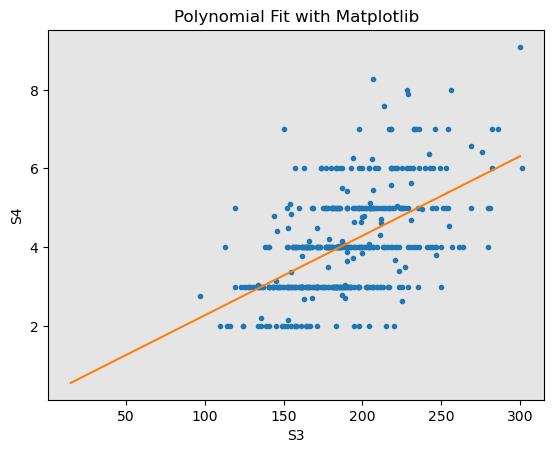

In [138]:
plot_poly(p,x,y,'S3', 'S4')

In [139]:
df[['AGE','BMI']].corr()

,AGE,BMI
AGE,1.000000,0.185085
BMI,0.185085,1.000000


In [140]:
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


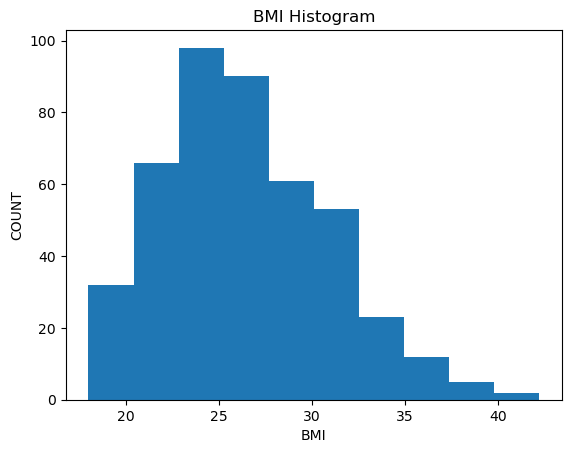

In [141]:
# Prep for binning, by showing the histogram and overall distribution

plt.pyplot.hist(df['BMI'])
plt.pyplot.xlabel('BMI')
plt.pyplot.ylabel('COUNT')
plt.pyplot.title('BMI Histogram')
plt.pyplot.show()

In [142]:
# From what we're seeing here, and from df.describe(), 20-30 is the most common
# Going to use my health knowledge and do some research on what's considered athletic, typical, overweight & obese
# Should probably separate this based on men and women (sex 1 & 2)
bins = (df['BMI'].min(),19,25,30, df['BMI'].max())
bins

(18.0, 19, 25, 30, 42.2)

In [143]:
group_names = ['Athletic', 'Normal', 'Overweight', 'Obese']
df['BMI Category'] = pd.cut(df['BMI'], bins, labels=group_names,include_lowest=True)
df['BMI Category']

0           Obese
1          Normal
2           Obese
3      Overweight
4          Normal
          ...    
437    Overweight
438        Normal
439        Normal
440    Overweight
441        Normal
Name: BMI Category, Length: 442, dtype: category
Categories (4, object): ['Athletic' < 'Normal' < 'Overweight' < 'Obese']

In [144]:
df['BMI Category'] = pd.Categorical(df['BMI Category'], categories = group_names, ordered=True)

In [145]:
# View preview of new df
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,BMI Category
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,Obese
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,Normal
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,Obese
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,Overweight
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,Normal


In [146]:
df['BMI Category'].value_counts()

Normal        182
Overweight    157
Obese          95
Athletic        8
Name: BMI Category, dtype: int64

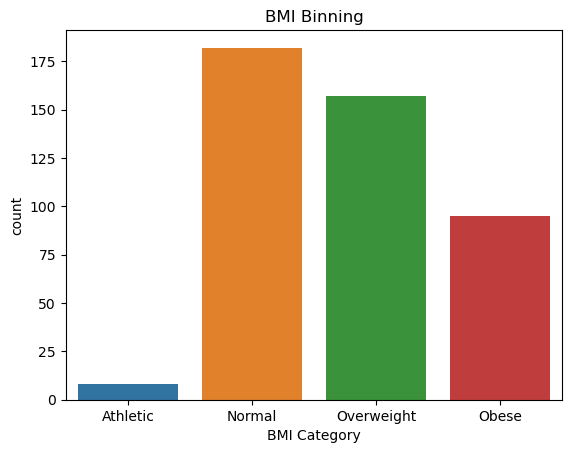

In [147]:
sns.countplot(x='BMI Category', data=df, order = df['BMI Category'].cat.categories)
plt.pyplot.title('BMI Binning')
plt.pyplot.show()

In [148]:
df[['BMI','BMI Category']].head(20)

,BMI,BMI Category
0,32.1,Obese
1,21.6,Normal
2,30.5,Obese
3,25.3,Overweight
4,23.0,Normal
5,22.6,Normal
6,22.0,Normal
7,26.2,Overweight
8,32.1,Obese
9,30.0,Overweight


In [149]:
# Ensuring we are only using two sexes
df['SEX'].value_counts()

1    235
2    207
Name: SEX, dtype: int64

In [150]:
# also, tbh i don't know which number represents men or women. 
# women generally have higher BMI because of breastfeeding and waists to carry,
# so, let's get that data
df.groupby('SEX')['BMI'].mean()

SEX
1    26.010638
2    26.790338
Name: BMI, dtype: float64

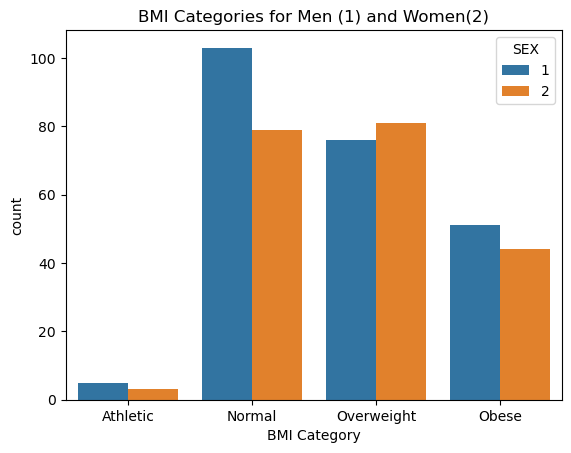

In [151]:
sns.countplot(x='BMI Category', data=df,hue='SEX', order=df['BMI Category'].cat.categories)
plt.pyplot.title('BMI Categories for Men (1) and Women(2)')
plt.pyplot.show()

In [152]:
# Let's bin men and women now that we know 1 is man and 2 is woman
# Male --> 1<=1.5, Female --> <1.5<=2
bins = [1,1.5,2]
group_names = ['Male','Female']
df['Sex - Categorical'] = pd.cut(df['SEX'], bins,labels=group_names,include_lowest=True)
df[['Sex - Categorical', 'SEX']]

,Sex - Categorical,SEX
0,Female,2
1,Male,1
2,Female,2
3,Male,1
4,Male,1
...,...,...
437,Female,2
438,Female,2
439,Female,2
440,Male,1


In [153]:
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y,BMI Category,Sex - Categorical
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151,Obese,Female
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75,Normal,Male
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141,Obese,Female
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206,Overweight,Male
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135,Normal,Male


In [154]:
X = df[['AGE', 'SEX', 'BP', 'S1', 'S2', 'S3', 'S4','S5','S6']]
Y = df['Y']
lm.fit(X,Y)

LinearRegression()

In [155]:
s = ''
for i in range(len(lm.coef_)):
    s+= '{}x{} + '.format(round(lm.coef_[i],2),i+1)
s+= str(round(lm.intercept_,2))

legend = '\n\nLegend: '
for i in range(len(X.columns)):
    legend+='\nx{} - {}'.format(i+1,X.columns[i].lower())    
    
print('The Equation to find "Y" (disease progression) can be written as\nY = {}{}'.format(s,legend))

The Equation to find "Y" (disease progression) can be written as
Y = -0.05x1 + -29.37x2 + 1.54x3 + -1.4x4 + 1.14x5 + 0.15x6 + 5.46x7 + 85.68x8 + 0.6x9 + -297.64

Legend: 
x1 - age
x2 - sex
x3 - bp
x4 - s1
x5 - s2
x6 - s3
x7 - s4
x8 - s5
x9 - s6


In [156]:
df.corr(numeric_only=True)

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


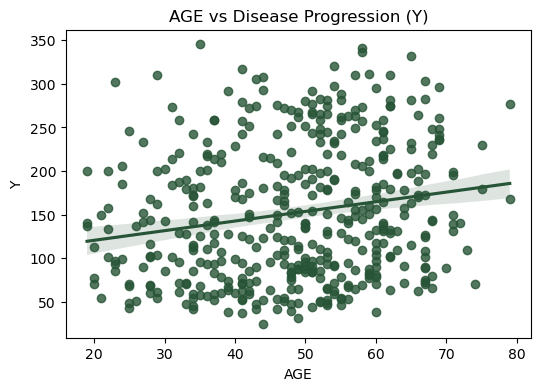

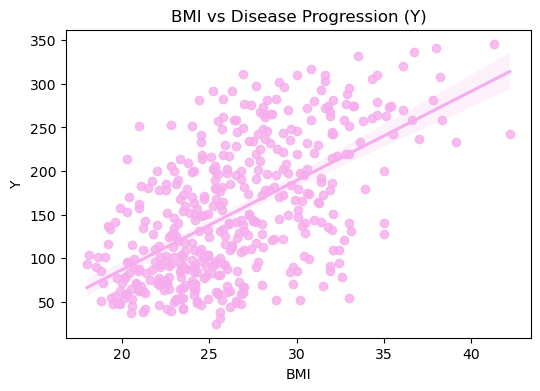

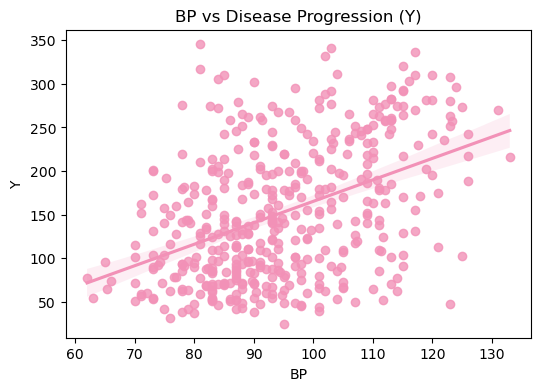

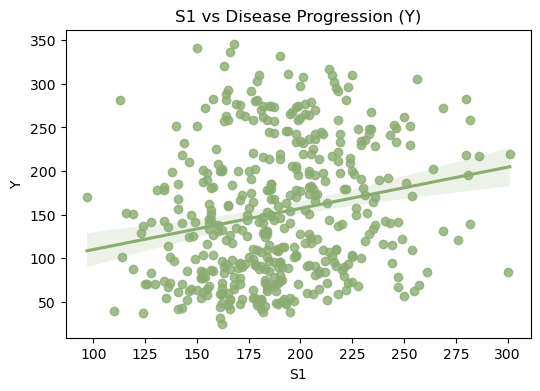

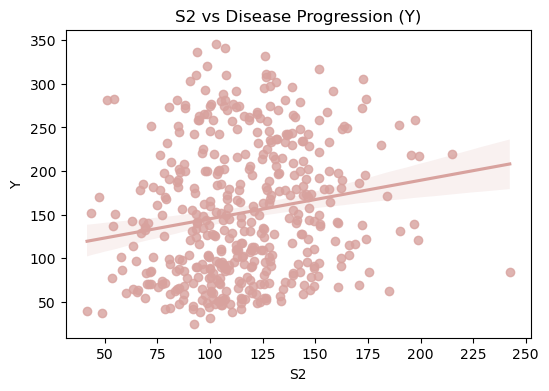

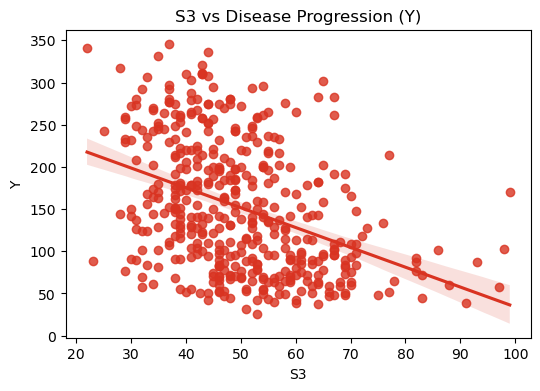

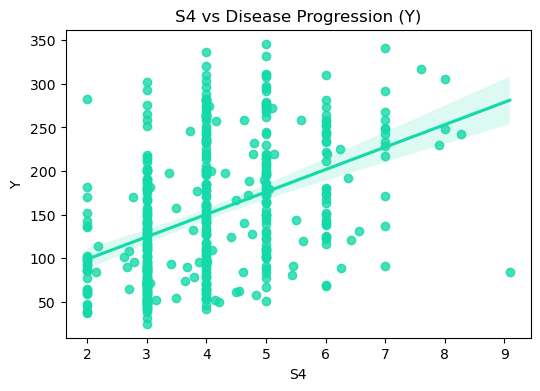

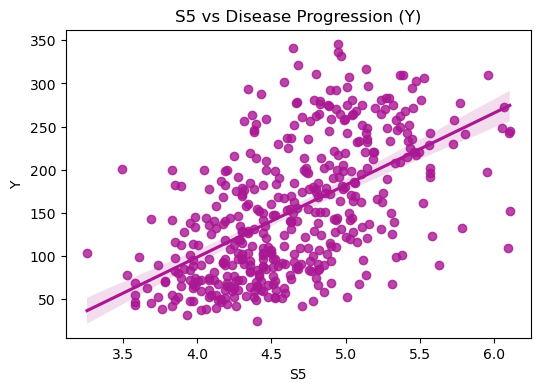

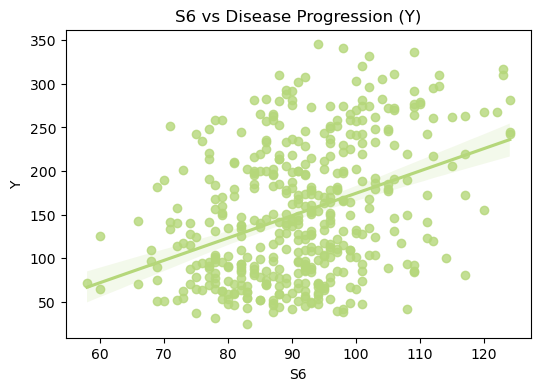

In [157]:
# Correlation between BMI and Disease Progression is (Obviously) significant. Let's plot it
# But, for the sake of practice, let's plot each numeric category next to disease progression aside from SEX

import random

def rand_color():
    color = (random.random(), random.random(),random.random())
    return color

for col in df.columns:
    if df[col].dtype!='int64'and df[col].dtype!='float64':
        continue
    if col=='Y' or col=='SEX':
        continue
    plt.pyplot.figure(figsize=(6,4))
    plt.pyplot.title('{} vs Disease Progression (Y)'.format(col))
    sns.regplot(x=col,y='Y',data=df,color= rand_color())

In [158]:
df_blood_cats = df[['BMI', 'BP','Y']]
grouped_index = df_blood_cats.groupby(['BMI','BP'],as_index=False).mean()
print('{}\n{}\n{}'.format(grouped_index.corr(numeric_only=True), grouped_index.describe(),grouped_index))

          BMI        BP         Y
BMI  1.000000  0.393308  0.585647
BP   0.393308  1.000000  0.440851
Y    0.585647  0.440851  1.000000
              BMI          BP           Y
count  435.000000  435.000000  435.000000
mean    26.426207   94.735586  152.859770
std      4.434901   13.907106   77.245359
min     18.000000   62.000000   25.000000
25%     23.200000   84.000000   87.500000
50%     25.800000   93.000000  141.000000
75%     29.450000  105.000000  214.000000
max     42.200000  133.000000  346.000000
      BMI     BP      Y
0    18.0   78.0   94.0
1    18.1   73.0  104.0
2    18.5   87.0   90.0
3    18.6   97.0  101.0
4    18.8   78.0   85.0
..    ...    ...    ...
430  38.2  123.0  308.0
431  38.3  113.0  259.0
432  39.1   90.0  233.0
433  41.3   81.0  346.0
434  42.2   99.0  242.0

[435 rows x 3 columns]


In [159]:
from scipy import stats

for col in df.columns:
    if df[col].dtype!='int64' and df[col].dtype!='float64':
        continue
    if col=='SEX' or col=='Y':
        continue
    pearson_coef,p_value = stats.pearsonr(df[col],df['Y'])
    print('\nThe Pearson Coefficient between "{}" and Disease Progression is {}, with a p-value of {}'
          .format(col,round(pearson_coef,4),round(p_value,4)))


The Pearson Coefficient between "AGE" and Disease Progression is 0.1879, with a p-value of 0.0001

The Pearson Coefficient between "BMI" and Disease Progression is 0.5865, with a p-value of 0.0

The Pearson Coefficient between "BP" and Disease Progression is 0.4415, with a p-value of 0.0

The Pearson Coefficient between "S1" and Disease Progression is 0.212, with a p-value of 0.0

The Pearson Coefficient between "S2" and Disease Progression is 0.1741, with a p-value of 0.0002

The Pearson Coefficient between "S3" and Disease Progression is -0.3948, with a p-value of 0.0

The Pearson Coefficient between "S4" and Disease Progression is 0.4305, with a p-value of 0.0

The Pearson Coefficient between "S5" and Disease Progression is 0.5659, with a p-value of 0.0

The Pearson Coefficient between "S6" and Disease Progression is 0.3825, with a p-value of 0.0


In [160]:
y_hat =lm.predict(X)
y_hat[:5]

array([179.44374593,  68.43490402, 151.59874457, 179.89442264,
       146.0354271 ])

In [161]:
"""plt.figure(figsize=(width,height))
ax1 = sns.distplot(df['price'],hist=False,color='g',label='Actual Value')
sns.distplot(Y_hat,hist=False, color='b', label='Fitted Values',ax=ax1)
plt.title('Actual vs Fitted Values for Price! Green - Real, Blue - Y-Hat')
plt.xlabel('Price (USD)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()"""

"plt.figure(figsize=(width,height))\nax1 = sns.distplot(df['price'],hist=False,color='g',label='Actual Value')\nsns.distplot(Y_hat,hist=False, color='b', label='Fitted Values',ax=ax1)\nplt.title('Actual vs Fitted Values for Price! Green - Real, Blue - Y-Hat')\nplt.xlabel('Price (USD)')\nplt.ylabel('Proportion of Cars')\nplt.show()\nplt.close()"

In [162]:
import matplotlib.pyplot as plt

/var/folders/cw/vqshbwbx0cb1d47hprg9bt1h0000gn/T/ipykernel_69824/35301446.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(Y,hist=False,color='r',label='Actual Value')
/var/folders/cw/vqshbwbx0cb1d47hprg9bt1h0000gn/T/ipykernel_69824/35301446.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad637275

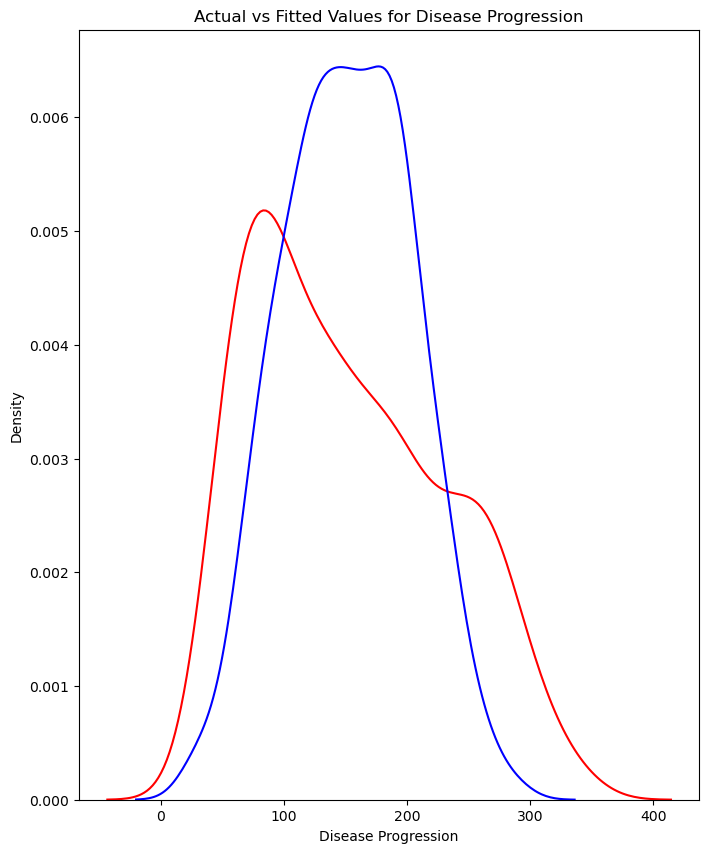

In [163]:
plt.figure(figsize=(8,10))
ax1 = sns.distplot(Y,hist=False,color='r',label='Actual Value')
sns.distplot(y_hat,hist=False,color='b',label='Fitted Values',ax=ax1)
plt.title('Actual vs Fitted Values for Disease Progression')
plt.xlabel('Disease Progression')
plt.show()

In [164]:
# let's try train-test splitting in this case

from sklearn.model_selection import train_test_split

# let's start with an overfitted split
x_train , x_test, y_train, y_test = train_test_split(X,Y, test_size =0.1,random_state =1)

print('Number of Train Samples - {} \nNumber of Test Samples - {}'
     .format(x_train.shape[0],x_test.shape[0]))

Number of Train Samples - 397 
Number of Test Samples - 45


In [165]:
# now, let's go for one a little less overfitting with 60/40 split

x_train1, x_test1, y_train1, y_test1 = train_test_split(X,Y, test_size=0.4, random_state=0)

In [166]:
print('Now, we are going to look at how the training data performs in linear regression.\nFirst, we will use the overfitted data')

for col in x_train.columns:
    lm = LinearRegression()
    lm.fit(x_train[[col]],y_train)
    train_score = lm.score(x_train[[col]],y_train)
    train_score = round(train_score*100,2)
    test_score = lm.score(x_test[[col]],y_test)
    test_score = round(test_score*100,2)
    print('\nColumn - "{}" being measured against Disease progression'
         .format(col))
    print('Train Score = {}% , Test Score = {}%'
         .format(train_score,test_score))

Now, we are going to look at how the training data performs in linear regression.
First, we will use the overfitted data

Column - "AGE" being measured against Disease progression
Train Score = 3.62% , Test Score = 1.53%

Column - "SEX" being measured against Disease progression
Train Score = 0.14% , Test Score = -0.4%

Column - "BP" being measured against Disease progression
Train Score = 19.29% , Test Score = 20.8%

Column - "S1" being measured against Disease progression
Train Score = 4.97% , Test Score = -1.95%

Column - "S2" being measured against Disease progression
Train Score = 3.28% , Test Score = -0.95%

Column - "S3" being measured against Disease progression
Train Score = 15.8% , Test Score = 12.42%

Column - "S4" being measured against Disease progression
Train Score = 19.58% , Test Score = 5.76%

Column - "S5" being measured against Disease progression
Train Score = 32.9% , Test Score = 21.73%

Column - "S6" being measured against Disease progression
Train Score = 14.38% 

In [167]:
# Clearly, you cannot just use on column
# for the sake of practice, let's use the other split (60/40)

for col in x_train1.columns:
    lm = LinearRegression()
    lm.fit(x_train1[[col]],y_train1)
    train_score = lm.score(x_train1[[col]],y_train1)
    train_score = round(train_score*100,2)
    test_score = lm.score(x_test1[[col]],y_test1)
    test_score = round(test_score*100,2)
    print('\nColumn - "{}" being measured against Disease progression'
         .format(col))
    print('Train Score = {}% , Test Score = {}%'
         .format(train_score,test_score))


Column - "AGE" being measured against Disease progression
Train Score = 3.03% , Test Score = 4.38%

Column - "SEX" being measured against Disease progression
Train Score = 0.13% , Test Score = 0.27%

Column - "BP" being measured against Disease progression
Train Score = 23.71% , Test Score = 10.43%

Column - "S1" being measured against Disease progression
Train Score = 5.38% , Test Score = 2.73%

Column - "S2" being measured against Disease progression
Train Score = 3.57% , Test Score = 1.95%

Column - "S3" being measured against Disease progression
Train Score = 18.39% , Test Score = 10.02%

Column - "S4" being measured against Disease progression
Train Score = 19.38% , Test Score = 16.94%

Column - "S5" being measured against Disease progression
Train Score = 37.64% , Test Score = 21.27%

Column - "S6" being measured against Disease progression
Train Score = 15.97% , Test Score = 12.19%


In [168]:
df.corr()

/var/folders/cw/vqshbwbx0cb1d47hprg9bt1h0000gn/T/ipykernel_69824/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [169]:
null_data = df.isnull()
null_data.value_counts()

AGE    SEX    BMI    BP     S1     S2     S3     S4     S5     S6     Y      BMI Category  Sex - Categorical
False  False  False  False  False  False  False  False  False  False  False  False         False                442
dtype: int64

In [170]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y',
       'BMI Category', 'Sex - Categorical'],
      dtype='object')

In [171]:
y_data = df['Y']
x_data = df.drop(columns={'Y','BMI Category', 'Sex - Categorical'},axis=1)
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y',
       'BMI Category', 'Sex - Categorical'],
      dtype='object')

In [172]:
# Also based on the plot, it's clear traditional linear regression will not work
# So, let's use polynomial feautures!

from sklearn.preprocessing import PolynomialFeatures

x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.3, random_state=0)
pr = PolynomialFeatures(degree=9)

x_train_pr = pr.fit_transform(x_train[['BMI']])
x_test_pr = pr.fit_transform(x_test[['BMI']])
pr

PolynomialFeatures(degree=9)

In [173]:
poly = LinearRegression()
poly.fit(x_train,y_train)

LinearRegression()

In [174]:
x_train_pr

array([[1.00000000e+00, 2.64000000e+01, 6.96960000e+02, ...,
        8.93773529e+09, 2.35956212e+11, 6.22924399e+12],
       [1.00000000e+00, 2.02000000e+01, 4.08040000e+02, ...,
        1.37233325e+09, 2.77211317e+10, 5.59966860e+11],
       [1.00000000e+00, 3.19000000e+01, 1.01761000e+03, ...,
        3.36151289e+10, 1.07232261e+12, 3.42070914e+13],
       ...,
       [1.00000000e+00, 2.44000000e+01, 5.95360000e+02, ...,
        5.14906986e+09, 1.25637305e+11, 3.06555023e+12],
       [1.00000000e+00, 1.96000000e+01, 3.84160000e+02, ...,
        1.11120068e+09, 2.17795334e+10, 4.26878854e+11],
       [1.00000000e+00, 3.30000000e+01, 1.08900000e+03, ...,
        4.26184430e+10, 1.40640862e+12, 4.64114844e+13]])

In [175]:
def poly_plot(xtrain,xtest,y_train,y_test, lr , poly_transform):
    width=12
    height=10
    plt.figure(figsize=(width,height))
    xmax = max([xtrain.values.max(), xtest.values.max()])
    xmin = min([xtrain.values.min(), xtest.values.min()])
    x = np.arange(xmin,xmax,0.1)
    plt.plot(xtrain,y_train, 'ro', label='Training Data')
    plt.plot(xtest,y_test, 'go', label='Test Data')
    plt.plot(x,lr.predict(poly_transform.fit_transform(x.reshape(-1,1))),label='Predicted Function')
    plt.ylabel('BMI')
    plt.legend()
    plt.show()

In [199]:
def f(order, test_data):
    x_train,x_test, y_train,y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['BMI']])
    x_test_pr = pr.fit_transform(x_test[['BMI']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    poly_plot(x_train['BMI'], x_test['BMI'], y_train, y_test, poly, pr)

In [200]:
from ipywidgets import interact, interactive, interact_manual

In [201]:
interact(f, order=(0,6,1), test_data = (.05,.95,.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>